# Dataset Preparation for Georgian-Latin(qwerty) Character Translation with Reversal

This notebook prepares the dataset from the Georgian poem 'Vepkhistkaosani' [text:](https://raw.githubusercontent.com/Anbani/anbani.db/master/datasets/vefxistyaosani.txt)
1. Downloading the raw text
2. Extracting words
3. Creating Georgian to Latin character mappings
4. Creating input-target pairs where targets are Latin-mapped reversed words
5. Limiting the dataset to 1000 samples
6. Make this dataset bidirectional where both Latin is translated to Georgian and vice versa

In [1]:
import re
import random
from typing import List, Tuple

DATA_DIR = '../data'

# Download the dataset
!wget https://raw.githubusercontent.com/Anbani/anbani.db/master/datasets/vefxistyaosani.txt -O $DATA_DIR/vefxistyaosani.txt

# Read the text file
with open(f'{DATA_DIR}/vefxistyaosani.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(f"Total text length: {len(text)} characters")
print("\nFirst 200 characters of the text:")
print(text[:200])

--2025-03-24 23:28:07--  https://raw.githubusercontent.com/Anbani/anbani.db/master/datasets/vefxistyaosani.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 863435 (843K) [text/plain]
Saving to: ‘../data/vefxistyaosani.txt’

../data/vefxistyaos 100%[===================>] 843.20K  4.25MB/s    in 0.2s    

2025-03-24 23:28:07 (4.25 MB/s) - ‘../data/vefxistyaosani.txt’ saved [863435/863435]

Total text length: 329322 characters

First 200 characters of the text:
ვეფხისტყაოსანი
დასაწყისი

რომელმან შექმნა სამყარო ძალითა მით ძლიერითა,
ზეგარდმო არსნი სულითა ყვნა ზეცით მონაბერითა,
ჩვენ, კაცთა, მოგვცა ქვეყანა, გვაქვს უთვალავი ფერითა,
და მისგან არს ყოვლი ხელმწიფე სა


In [2]:
# Define Georgian to Latin character mapping based on keyboard layout
georgian_to_latin = {
    'ა': 'a', 'ბ': 'b', 'გ': 'g', 'დ': 'd', 'ე': 'e', 'ვ': 'v', 'ზ': 'z',
    'თ': 'T', 'ი': 'i', 'კ': 'k', 'ლ': 'l', 'მ': 'm', 'ნ': 'n', 'ო': 'o',
    'პ': 'p', 'ჟ': 'J', 'რ': 'r', 'ს': 's', 'ტ': 't', 'უ': 'u', 'ფ': 'f',
    'ქ': 'q', 'ღ': 'R', 'ყ': 'y', 'შ': 'S', 'ჩ': 'C', 'ც': 'c', 'ძ': 'Z',
    'წ': 'w', 'ჭ': 'W', 'ხ': 'x', 'ჯ': 'j', 'ჰ': 'h'
}

# Create reverse mapping for verification
latin_segments = set(georgian_to_latin.values())
print("Unique Latin character segments:", sorted(latin_segments))
print(f"Number of Georgian characters: {len(georgian_to_latin)}")
print(f"Number of unique Latin segments: {len(latin_segments)}")

Unique Latin character segments: ['C', 'J', 'R', 'S', 'T', 'W', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of Georgian characters: 33
Number of unique Latin segments: 33


In [3]:
def map_georgian_to_latin(word: str) -> str:
    """Convert Georgian word to Latin characters."""
    result = ''
    for char in word:
        result += georgian_to_latin.get(char, char)
    return result

def extract_georgian_words(text: str) -> List[str]:
    """Extract Georgian words from text using regex."""
    pattern = r'[აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ]+'
    return re.findall(pattern, text)

# Extract words
georgian_words = extract_georgian_words(text)
print(f"Total words found: {len(georgian_words)}")

# Show some example words and their Latin mappings
print("\nExample words and their Latin mappings:")
for word in georgian_words[:5]:
    print(f"{word} -> {map_georgian_to_latin(word)}")

Total words found: 46273

Example words and their Latin mappings:
ვეფხისტყაოსანი -> vefxistyaosani
დასაწყისი -> dasawyisi
რომელმან -> romelman
შექმნა -> Seqmna
სამყარო -> samyaro


In [4]:
def create_input_target_pairs(words: List[str]) -> List[Tuple[str, str]]:
    """Create input-target pairs where target is Latin-mapped reversed word."""
    pairs = []
    for word in words:
        latin_mapped = map_georgian_to_latin(word)
        reversed_mapped = latin_mapped[::-1]
        pairs.append((word, reversed_mapped))
    return pairs

DATASET_SIZE = 10000

# Create input-target pairs
all_pairs = create_input_target_pairs(georgian_words)

# Limit to 1000 random samples
random.seed(42)  # for reproducibility
selected_pairs = random.sample(all_pairs, min(DATASET_SIZE, len(all_pairs)))


assert len(selected_pairs) == DATASET_SIZE
swapped_pairs = [(target, source) for source, target in selected_pairs[DATASET_SIZE//2:]]
pairs = selected_pairs[:DATASET_SIZE//2] + swapped_pairs

random.seed(42)
random.shuffle(pairs)

print(f"Total pairs created: {len(all_pairs)}")
print(f"Selected and swapped pairs: {len(pairs)}")

# Show some examples
print("\nExample pairs (Georgian -> Reversed Latin):")
for georgian, latin in pairs[:5]:
    print(f"{georgian} -> {latin}")

Total pairs created: 46273
Selected and swapped pairs: 10000

Example pairs (Georgian -> Reversed Latin):
კარ -> rak
ad -> და
dar -> რად
თანა -> anaT
ნურა -> arun


In [5]:
# Save the prepared dataset
import json

dataset = {
    'pairs': selected_pairs,
    'georgian_to_latin_map': georgian_to_latin
}

with open(f'{DATA_DIR}/prepared_dataset.json', 'w', encoding='utf-8') as f:
    json.dump(dataset, f, ensure_ascii=False, indent=2)

print(f"Dataset saved to '{DATA_DIR}/prepared_dataset.json'")

# Print dataset statistics
print(f"\nDataset statistics:")
print(f"Total number of pairs: {len(selected_pairs)}")

# Calculate average lengths
avg_georgian_len = sum(len(g) for g, _ in selected_pairs) / len(selected_pairs)
avg_latin_len = sum(len(e) for _, e in selected_pairs) / len(selected_pairs)

print(f"Average Georgian word length: {avg_georgian_len:.2f}")
print(f"Average Latin mapped length: {avg_latin_len:.2f}")

# Show character set statistics
georgian_chars = set(''.join(g for g, _ in selected_pairs))
latin_chars = set(''.join(e for _, e in selected_pairs))

print(f"\nUnique Georgian characters: {len(georgian_chars)}")
print(f"Georgian characters: {''.join(sorted(georgian_chars))}")
print(f"\nUnique Latin characters: {len(latin_chars)}")
print(f"Latin characters: {''.join(sorted(latin_chars))}")

Dataset saved to '../data/prepared_dataset.json'

Dataset statistics:
Total number of pairs: 10000
Average Georgian word length: 5.69
Average Latin mapped length: 5.69

Unique Georgian characters: 33
Georgian characters: აბგდევზთიკლმნოპჟრსტუფქღყშჩცძწჭხჯჰ

Unique Latin characters: 33
Latin characters: CJRSTWZabcdefghijklmnopqrstuvwxyz


In [6]:
dataset.keys()

dict_keys(['pairs', 'georgian_to_latin_map'])

In [7]:
dataset['pairs'][:5]

[('ღაწვთა', 'aTvwaR'),
 ('საკნით', 'Tinkas'),
 ('საჭურჭლე', 'elWruWas'),
 ('ვპოვენ', 'nevopv'),
 ('მმართებს', 'sbeTramm')]

In [8]:
list(dataset['georgian_to_latin_map'].items())[:5]

[('ა', 'a'), ('ბ', 'b'), ('გ', 'g'), ('დ', 'd'), ('ე', 'e')]

# Simple Dataset for Text Pairs 

In [9]:
import torch
import numpy as np
import torch.nn as nn

def seed_everything(seed=42):
    """Seed all random number generators for reproducibility"""
    
    # Python random
    random.seed(seed)
    
    # Numpy
    np.random.seed(seed)
    
    # PyTorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # Current GPU
    torch.cuda.manual_seed_all(seed)  # All GPUs
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [10]:
class GeoToRevLatinDataset(torch.utils.data.Dataset):
    
    def __init__(self, pairs, geo_latin_map):
        self.pairs = pairs
        self.geo_latin_map = geo_latin_map
        
        self._generate_mapping()
        
    
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        if idx < len(self.pairs):
            source, target = self.pairs[idx]
            return self.tokenize(source=source, target=target)
        else:
            raise ValueError('Index out of bound')
    
    def _generate_mapping(self):
        self.char_to_idx = {char:idx for idx,char in enumerate(list(self.geo_latin_map.keys()) + list(self.geo_latin_map.values()))}
        self.idx_to_char = {v:k for k,v in self.char_to_idx.items()}

        # add END token
        self.char_to_idx["<end>"] = len(self.char_to_idx)
        self.idx_to_char[len(self.idx_to_char)] = "<end>"
        
        # add PAD token for padding tails
        self.char_to_idx["<pad>"] = len(self.char_to_idx)
        self.idx_to_char[len(self.idx_to_char)] = "<pad>"
        
        # calculate max length of sequence for padding purposes (+1 for appending END token also)
        self.max_length = int(np.max([len(src) for src, _ in self.pairs])) + 1
    
    def tokenize(self, source, target):
        source_tokenized = [self.char_to_idx[char] for char in source]
        source_tokenized.append(self.char_to_idx["<end>"])

        target_tokenized = [self.char_to_idx[char] for char in target]
        target_tokenized.append(self.char_to_idx["<end>"])
        
        while len(source_tokenized) < self.max_length:
            source_tokenized.append(self.char_to_idx["<pad>"])

        while len(target_tokenized) < self.max_length:
            target_tokenized.append(self.char_to_idx["<pad>"])
            
        return np.array(source_tokenized), np.array(target_tokenized)


ds = GeoToRevLatinDataset(pairs=dataset['pairs'], geo_latin_map=dataset['georgian_to_latin_map'])
len(ds), ds.char_to_idx, ds[0], ds.pairs[0]

(10000,
 {'ა': 0,
  'ბ': 1,
  'გ': 2,
  'დ': 3,
  'ე': 4,
  'ვ': 5,
  'ზ': 6,
  'თ': 7,
  'ი': 8,
  'კ': 9,
  'ლ': 10,
  'მ': 11,
  'ნ': 12,
  'ო': 13,
  'პ': 14,
  'ჟ': 15,
  'რ': 16,
  'ს': 17,
  'ტ': 18,
  'უ': 19,
  'ფ': 20,
  'ქ': 21,
  'ღ': 22,
  'ყ': 23,
  'შ': 24,
  'ჩ': 25,
  'ც': 26,
  'ძ': 27,
  'წ': 28,
  'ჭ': 29,
  'ხ': 30,
  'ჯ': 31,
  'ჰ': 32,
  'a': 33,
  'b': 34,
  'g': 35,
  'd': 36,
  'e': 37,
  'v': 38,
  'z': 39,
  'T': 40,
  'i': 41,
  'k': 42,
  'l': 43,
  'm': 44,
  'n': 45,
  'o': 46,
  'p': 47,
  'J': 48,
  'r': 49,
  's': 50,
  't': 51,
  'u': 52,
  'f': 53,
  'q': 54,
  'R': 55,
  'y': 56,
  'S': 57,
  'C': 58,
  'c': 59,
  'Z': 60,
  'w': 61,
  'W': 62,
  'x': 63,
  'j': 64,
  'h': 65,
  '<end>': 66,
  '<pad>': 67},
 (array([22,  0, 28,  5,  7,  0, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67]),
  array([33, 40, 38, 61, 33, 55, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67])),
 ('ღაწვთა', 'aTvwaR'))

# GRU Encoder+Decoder (Seq2seq) with Attention

In [11]:
import torch
import torch.nn as nn
import math
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset



class Attention(nn.Module):
    """Simple dot product attention for seq2seq translation."""
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim

    def forward(self, hidden, encoder_outputs):
        # hidden: (batch_size, hidden_dim)
        # encoder_outputs: (batch_size, seq_len, hidden_dim)
        
        # Compute attention scores using dot product
        # First reshape hidden to (batch_size, 1, hidden_dim)
        hidden = hidden.unsqueeze(1)
        
        # Compute dot product and scale by sqrt(hidden_dim)
        scores = torch.matmul(hidden, encoder_outputs.transpose(1, 2)) / torch.sqrt(torch.tensor(self.hidden_dim, dtype=torch.float32))
        
        # Squeeze to get (batch_size, seq_len)
        scores = scores.squeeze(1)
        
        # Apply softmax to get attention weights
        return F.softmax(scores, dim=1) 

class AttentionEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(AttentionEncoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_dim, hidden_dim)
        self.rnn = nn.GRU(hidden_dim, hidden_dim, num_layers, batch_first=True)

    def forward(self, x):
        embedded = self.embedding(x)
        outputs, hidden = self.rnn(embedded)
        return outputs, hidden
    
class AttentionDecoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(AttentionDecoder, self).__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(input_dim, hidden_dim)
        self.attention = Attention(hidden_dim)
        self.rnn = nn.GRU(hidden_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden, encoder_outputs):
        embedded = self.embedding(x)
        
        attention_weights = self.attention(hidden[-1], encoder_outputs)
        attention_weights = attention_weights.unsqueeze(1)
        context = torch.bmm(attention_weights, encoder_outputs)
        
        rnn_input = torch.cat((embedded, context), dim=2)
        output, hidden = self.rnn(rnn_input, hidden)
        prediction = self.fc(output)
        
        return prediction, hidden, attention_weights

class AttentionSeq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(AttentionSeq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, input_seq, target_seq, teacher_forcing_ratio=1.0):
        encoder_outputs, encoder_hidden = self.encoder(input_seq)
        
        decoder_input = torch.zeros_like(target_seq[:, 0]).unsqueeze(1)
        decoder_hidden = encoder_hidden
        
        decoder_outputs = []
        attentions = []
        
        for i in range(target_seq.shape[1]):
            decoder_output, decoder_hidden, attention = self.decoder(
                decoder_input, 
                decoder_hidden,
                encoder_outputs
            )
            decoder_outputs.append(decoder_output)
            attentions.append(attention)

            # Teacher forcing: use target sequence as next input with probability teacher_forcing_ratio
            if torch.rand(1).item() < teacher_forcing_ratio:
                decoder_input = target_seq[:, i].unsqueeze(1)
            else:
                # Use model's own prediction as next input
                decoder_input = decoder_output.argmax(dim=-1)
        
        decoder_outputs = torch.cat(decoder_outputs, dim=1)
        attentions = torch.cat(attentions, dim=1)
        
        return decoder_outputs, attentions

In [12]:
import datetime
import os
import torch
from torch.utils.tensorboard import SummaryWriter

def train_with_validation(attention_model, train_dl, val_dl, attention_optimizer, attention_criterion, 
                         num_epochs=20, device='cuda', output_dim=None, teacher_forcing_ratio=1.0):
    """
    Train the attention model with validation at the end of each epoch.
    
    Args:
        attention_model: The model to train
        train_dl: Training dataloader
        val_dl: Validation dataloader
        attention_optimizer: Optimizer for the model
        attention_criterion: Loss function
        num_epochs: Number of epochs to train
        device: Device to train on ('cuda' or 'cpu')
        output_dim: Output dimension of the model
    """
    # Create a unique run name with timestamp
    current_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    log_dir = os.path.join('runs', f'seq2seq_{current_time}')
    writer = SummaryWriter(log_dir)
    
    global_step = 0
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        # Training phase
        attention_model.train()
        total_train_loss = 0
        total_train_chars = 0
        correct_train_chars = 0
        
        for inputs, targets in train_dl:
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            attention_optimizer.zero_grad()
            outputs, attentions = attention_model(inputs, targets, teacher_forcing_ratio=teacher_forcing_ratio)
            loss = attention_criterion(outputs.view(-1, output_dim), targets.view(-1))
            loss.backward()
            attention_optimizer.step()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, dim=2)
            mask = targets != 0  # Don't count padding in accuracy
            correct_train_chars += (predicted == targets)[mask].sum().item()
            total_train_chars += mask.sum().item()
            
            # Log training metrics per batch
            writer.add_scalar('AttentionModel/Train/Loss/batch', loss.item(), global_step)
            writer.add_scalar('AttentionModel/Train/Accuracy/batch', 
                            correct_train_chars / max(1, total_train_chars), 
                            global_step)
            
            total_train_loss += loss.item()
            global_step += 1
        
        # Calculate epoch training metrics
        epoch_train_loss = total_train_loss / len(train_dl)
        epoch_train_accuracy = correct_train_chars / max(1, total_train_chars)
        
        # Validation phase
        attention_model.eval()
        total_val_loss = 0
        total_val_chars = 0
        correct_val_chars = 0
        
        with torch.no_grad():
            for inputs, targets in val_dl:
                inputs = inputs.to(device)
                targets = targets.to(device)
                
                outputs, attentions = attention_model(inputs, targets, teacher_forcing_ratio=teacher_forcing_ratio)
                loss = attention_criterion(outputs.view(-1, output_dim), targets.view(-1))
                
                # Calculate accuracy
                _, predicted = torch.max(outputs, dim=2)
                mask = targets != 0  # Don't count padding in accuracy
                correct_val_chars += (predicted == targets)[mask].sum().item()
                total_val_chars += mask.sum().item()
                
                total_val_loss += loss.item()
        
        # Calculate epoch validation metrics
        epoch_val_loss = total_val_loss / len(val_dl)
        epoch_val_accuracy = correct_val_chars / max(1, total_val_chars)
        
        # Log epoch metrics for both training and validation
        writer.add_scalar('AttentionModel/Train/Loss/epoch', epoch_train_loss, epoch)
        writer.add_scalar('AttentionModel/Train/Accuracy/epoch', epoch_train_accuracy, epoch)
        writer.add_scalar('AttentionModel/Val/Loss/epoch', epoch_val_loss, epoch)
        writer.add_scalar('AttentionModel/Val/Accuracy/epoch', epoch_val_accuracy, epoch)
        
        # Print epoch summary
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'\tTrain Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}')
        print(f'\tVal Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.4f}')
        
        # Save best model based on validation loss
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save(attention_model.state_dict(), os.path.join(log_dir, 'best_model.pt'))
            print(f'\tSaved new best model with validation loss: {best_val_loss:.4f}')
    
    writer.close()
    return best_val_loss 


def test_model(model, test_dl, criterion, device='cuda', output_dim=None, model_path=None, teacher_forcing_ratio=1.0):
    """
    Test the model on a test dataset.
    
    Args:
        model: The model to test
        test_dl: Test dataloader
        criterion: Loss function
        device: Device to test on ('cuda' or 'cpu')
        output_dim: Output dimension of the model
        model_path: Path to the saved model weights (optional)
    
    Returns:
        dict: Dictionary containing test metrics (loss and accuracy)
    """
    # Load model weights if path is provided
    if model_path:
        model.load_state_dict(torch.load(model_path))
        print(f"Loaded model from {model_path}")
    
    # Set model to evaluation mode
    model.eval()
    
    # Initialize metrics
    total_test_loss = 0
    total_test_chars = 0
    correct_test_chars = 0
    
    # Create a unique run name with timestamp for logging
    current_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    log_dir = os.path.join('runs', f'test_{current_time}')
    writer = SummaryWriter(log_dir)
    
    # Testing phase
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(test_dl):
            inputs = inputs.to(device)
            targets = targets.to(device)
            
            # Forward pass
            outputs, attentions = model(inputs, targets, teacher_forcing_ratio=teacher_forcing_ratio)
            loss = criterion(outputs.view(-1, output_dim), targets.view(-1))
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, dim=2)
            mask = targets != 0  # Don't count padding in accuracy
            correct_test_chars += (predicted == targets)[mask].sum().item()
            total_test_chars += mask.sum().item()
            
            total_test_loss += loss.item()
            
            # Log batch metrics
            writer.add_scalar('Test/Loss/batch', loss.item(), batch_idx)
            writer.add_scalar('Test/Accuracy/batch', 
                            correct_test_chars / max(1, total_test_chars), 
                            batch_idx)
    
    # Calculate final test metrics
    test_loss = total_test_loss / len(test_dl)
    test_accuracy = correct_test_chars / max(1, total_test_chars)
    
    # Log final metrics
    writer.add_scalar('Test/Loss/final', test_loss, 0)
    writer.add_scalar('Test/Accuracy/final', test_accuracy, 0)
    writer.close()
    
    # Print test results
    print("\nTest Results:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    return {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    } 

In [13]:
# Parameters
input_dim = len(ds.char_to_idx)
hidden_dim = 8
output_dim = len(ds.char_to_idx)
num_layers = 1
batch_size = 128
num_epochs = 100 # 100
learning_rate = 1e-3
teacher_forcing_ratio = 1.0

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
attention_encoder = AttentionEncoder(input_dim, hidden_dim, num_layers)
attention_decoder = AttentionDecoder(input_dim, hidden_dim, output_dim, num_layers)
attention_model = AttentionSeq2Seq(attention_encoder, attention_decoder)
attention_model = attention_model.to(device)

# Loss and Optimizer
attention_criterion = nn.CrossEntropyLoss()
attention_optimizer = optim.Adam(attention_model.parameters(), lr=learning_rate)

# Dataset Splits
from sklearn.model_selection import train_test_split
train_pairs, temp_pairs = train_test_split(dataset['pairs'], train_size=0.9, random_state=42)
val_pairs, test_pairs = train_test_split(temp_pairs, train_size=0.5, random_state=42)

# Create datasets
train_ds = GeoToRevLatinDataset(pairs=train_pairs, geo_latin_map=dataset['georgian_to_latin_map'])
val_ds = GeoToRevLatinDataset(pairs=val_pairs, geo_latin_map=dataset['georgian_to_latin_map'])
test_ds = GeoToRevLatinDataset(pairs=test_pairs, geo_latin_map=dataset['georgian_to_latin_map'])

# Create DataLoaders
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

attention_model, next(iter(train_dl))

(AttentionSeq2Seq(
   (encoder): AttentionEncoder(
     (embedding): Embedding(68, 8)
     (rnn): GRU(8, 8, batch_first=True)
   )
   (decoder): AttentionDecoder(
     (embedding): Embedding(68, 8)
     (attention): Attention()
     (rnn): GRU(16, 8, batch_first=True)
     (fc): Linear(in_features=8, out_features=68, bias=True)
   )
 ),
 [tensor([[ 7, 19, 66,  ..., 67, 67, 67],
          [12,  0, 30,  ..., 67, 67, 67],
          [ 2,  0, 11,  ..., 67, 67, 67],
          ...,
          [17, 31, 13,  ..., 67, 67, 67],
          [ 5,  8,  7,  ..., 67, 67, 67],
          [ 5, 11, 29,  ..., 67, 67, 67]]),
  tensor([[52, 40, 66,  ..., 67, 67, 67],
          [33, 38, 63,  ..., 67, 67, 67],
          [50, 37, 45,  ..., 67, 67, 67],
          ...,
          [50, 34, 46,  ..., 67, 67, 67],
          [33, 40, 41,  ..., 67, 67, 67],
          [41, 34, 37,  ..., 67, 67, 67]])])

In [14]:
best_val_loss = train_with_validation(
    attention_model=attention_model,
    train_dl=train_dl,
    val_dl=val_dl,
    attention_optimizer=attention_optimizer,
    attention_criterion=attention_criterion,
    num_epochs=num_epochs,
    device=device,
    output_dim=output_dim
)

Epoch [1/100]
	Train Loss: 3.6145, Train Accuracy: 0.3955
	Val Loss: 3.0313, Val Accuracy: 0.5607
	Saved new best model with validation loss: 3.0313
Epoch [2/100]
	Train Loss: 2.4819, Train Accuracy: 0.5815
	Val Loss: 2.1992, Val Accuracy: 0.5608
	Saved new best model with validation loss: 2.1992
Epoch [3/100]
	Train Loss: 1.9777, Train Accuracy: 0.5816
	Val Loss: 1.9125, Val Accuracy: 0.5628
	Saved new best model with validation loss: 1.9125
Epoch [4/100]
	Train Loss: 1.7454, Train Accuracy: 0.5927
	Val Loss: 1.7162, Val Accuracy: 0.5939
	Saved new best model with validation loss: 1.7162
Epoch [5/100]
	Train Loss: 1.5708, Train Accuracy: 0.6198
	Val Loss: 1.5576, Val Accuracy: 0.6111
	Saved new best model with validation loss: 1.5576
Epoch [6/100]
	Train Loss: 1.4310, Train Accuracy: 0.6370
	Val Loss: 1.4341, Val Accuracy: 0.6383
	Saved new best model with validation loss: 1.4341
Epoch [7/100]
	Train Loss: 1.3300, Train Accuracy: 0.6652
	Val Loss: 1.3471, Val Accuracy: 0.6607
	Saved n

In [15]:
test_results = test_model(
    model=attention_model,
    test_dl=test_dl,
    criterion=attention_criterion,
    device=device,
    output_dim=output_dim,
    # model_path='runs/seq2seq_20240321-123456/best_model.pt'
)


Test Results:
Test Loss: 0.9278
Test Accuracy: 0.7404


In [16]:
inference_samples = [
    "ოლიმპიადა",
    "რეკურენტული",
    "ყურადღება",
    "ააააა",
] + [src for src, tgt in test_ds.pairs[-5:]]

inference_samples



['ოლიმპიადა',
 'რეკურენტული',
 'ყურადღება',
 'ააააა',
 'გაგიხდი',
 'ვარ',
 'მზე',
 'მოჰხსნნის',
 'დავრჩები']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_attention(model, dataset, inference_samples, device, teacher_forcing_ratio=1.0, global_step=None):
    # Create timestamp for unique run directory
    timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    writer = SummaryWriter(f'runs/attention_visualization_{timestamp}')
    
    if global_step is None:
        global_step = 0
    
    with torch.no_grad():
        for sample in inference_samples:
            # Tokenize only source (target not needed)
            source, _ = dataset.tokenize(source=sample, target="")
            assert len(source) == dataset.max_length

            # Batch size 1
            source_tensor = torch.tensor([source], dtype=torch.long).to(device)

            # Predict and get indices
            predicted, attentions = model(source_tensor, source_tensor, teacher_forcing_ratio=teacher_forcing_ratio)
            _, predicted_indices = torch.max(predicted, 2)

            # Decode predicted text
            predicted_chars = ""
            for i in predicted_indices[0]:
                predicted_chars += dataset.idx_to_char.get(i.item(), "?")
        
            # Log example predictions with attention
            writer.add_text('AttentionModel/Predictions', 
                        f'Input: {sample}\nTarget: \nPrediction: {predicted_chars}', 
                        global_step)
            
            print("Input:", sample)
            print("Target:", "")
            print("Prediction:", predicted_chars)
        
            # Visualize attention weights
            plt.figure(figsize=(12, 8))
            attention_weights = attentions[0].cpu().numpy()
            
            # Get input and output characters for axis labels
            input_chars = [dataset.idx_to_char[i.item()] for i in source_tensor[0]]
            output_chars = [dataset.idx_to_char[i.item()] for i in predicted_indices[0]]
            
            # Create heatmap with character labels
            sns.heatmap(attention_weights, 
                       cmap='viridis',
                       xticklabels=input_chars,
                       yticklabels=output_chars,
                       cbar_kws={'label': 'Attention Weight'})
            
            plt.xlabel('Input Sequence')
            plt.ylabel('Output Sequence')
            plt.title('Attention Weights Visualization')
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
            
            # Save attention visualization to tensorboard
            writer.add_figure('AttentionModel/attention_weights', plt.gcf(), global_step)
            # plt.close()  # Close the figure to free memory
            
            global_step += 1
    
    writer.close()
    print(f"Visualizations have been logged to TensorBoard. Run 'tensorboard --logdir=runs/attention_visualization_{timestamp}' to view them.") 

/var/folders/t2/72xb54sx38d48l3rgd_9qy4m0000gn/T/ipykernel_58218/2086753356.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  source_tensor = torch.tensor([source], dtype=torch.long).to(device)


Input: ოლიმპიადა
Target: 
Prediction: aaaaaaaaaa<pad><pad><pad><pad><pad><pad>


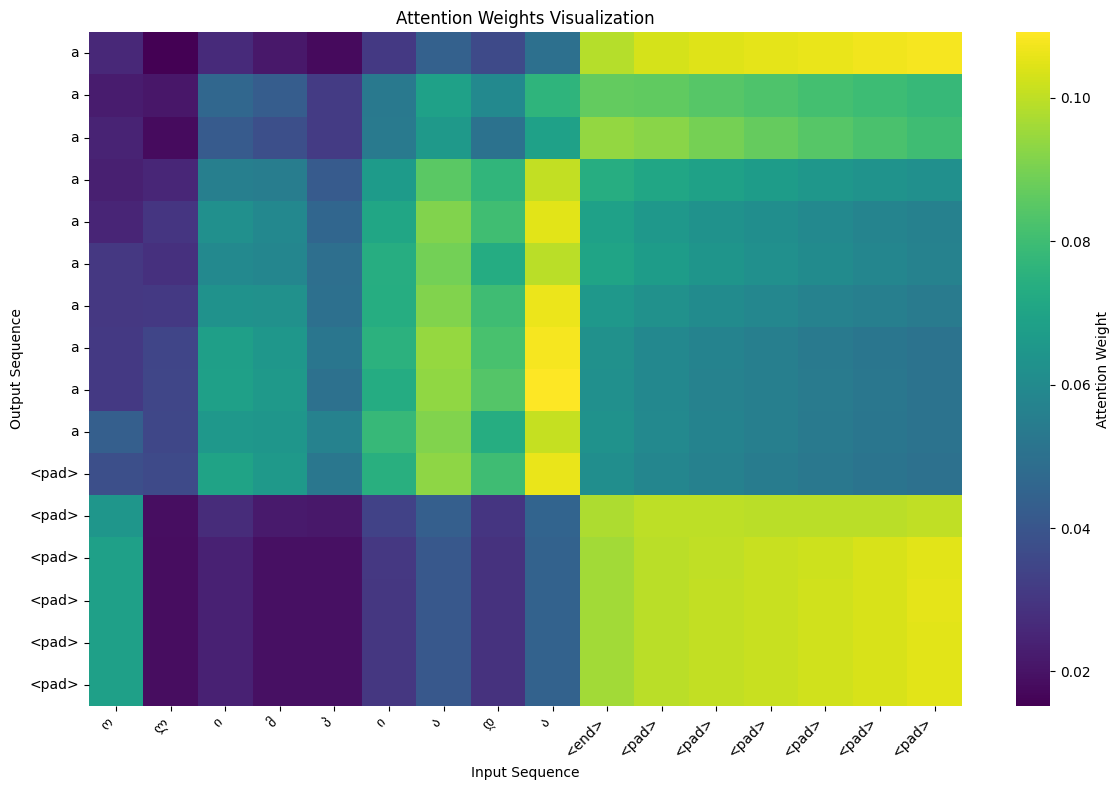

Input: რეკურენტული
Target: 
Prediction: iiaaaaaaaaaa<pad><pad><pad><pad>


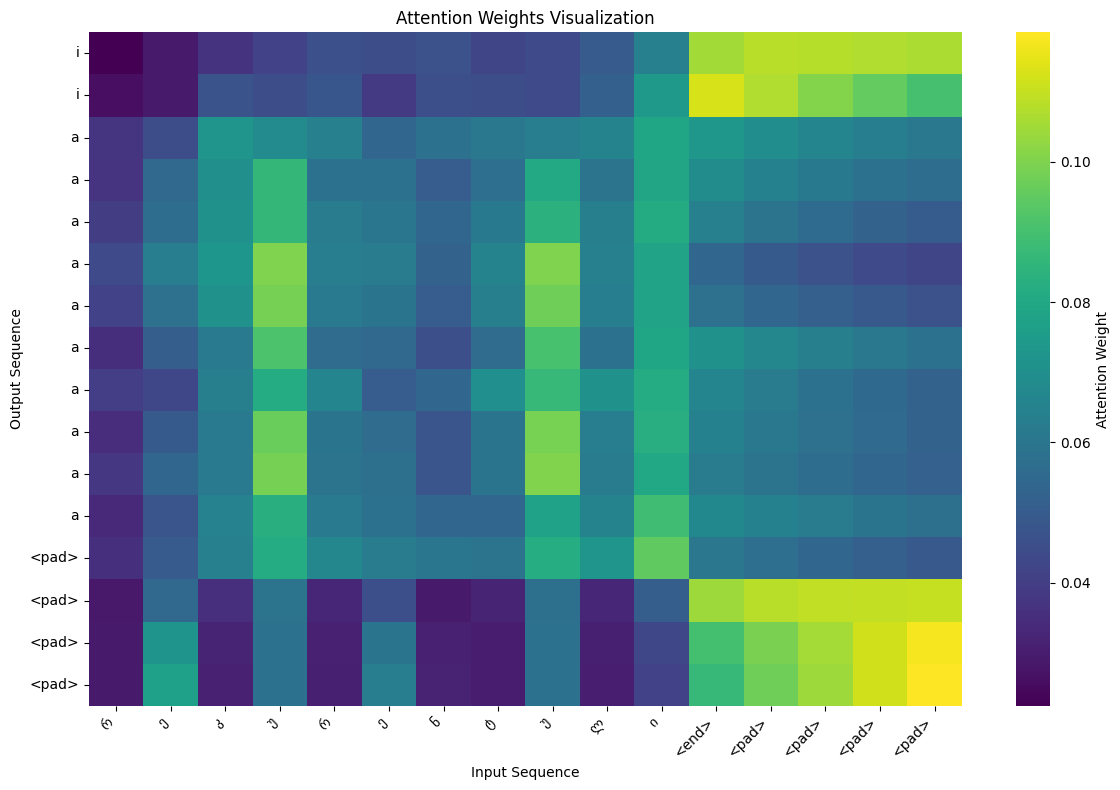

Input: ყურადღება
Target: 
Prediction: aaaaaa<pad><pad><pad><end><pad><pad><pad><pad><pad><pad>


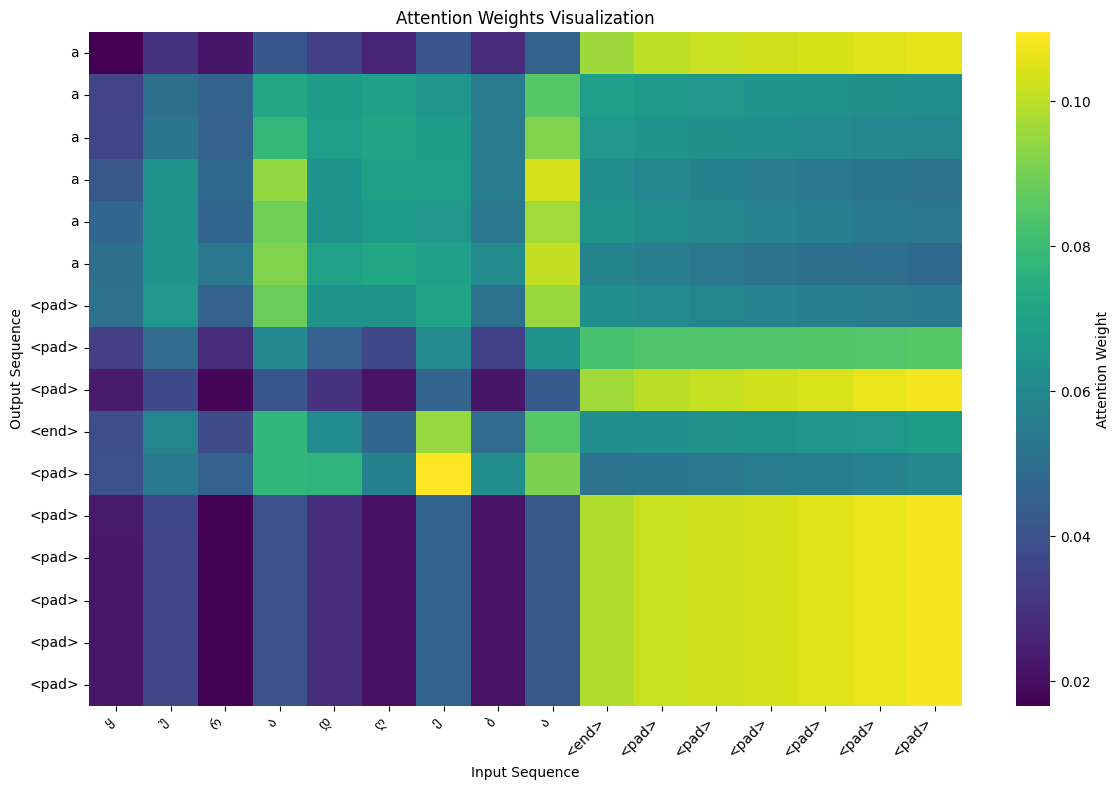

Input: ააააა
Target: 
Prediction: aaaaaa<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


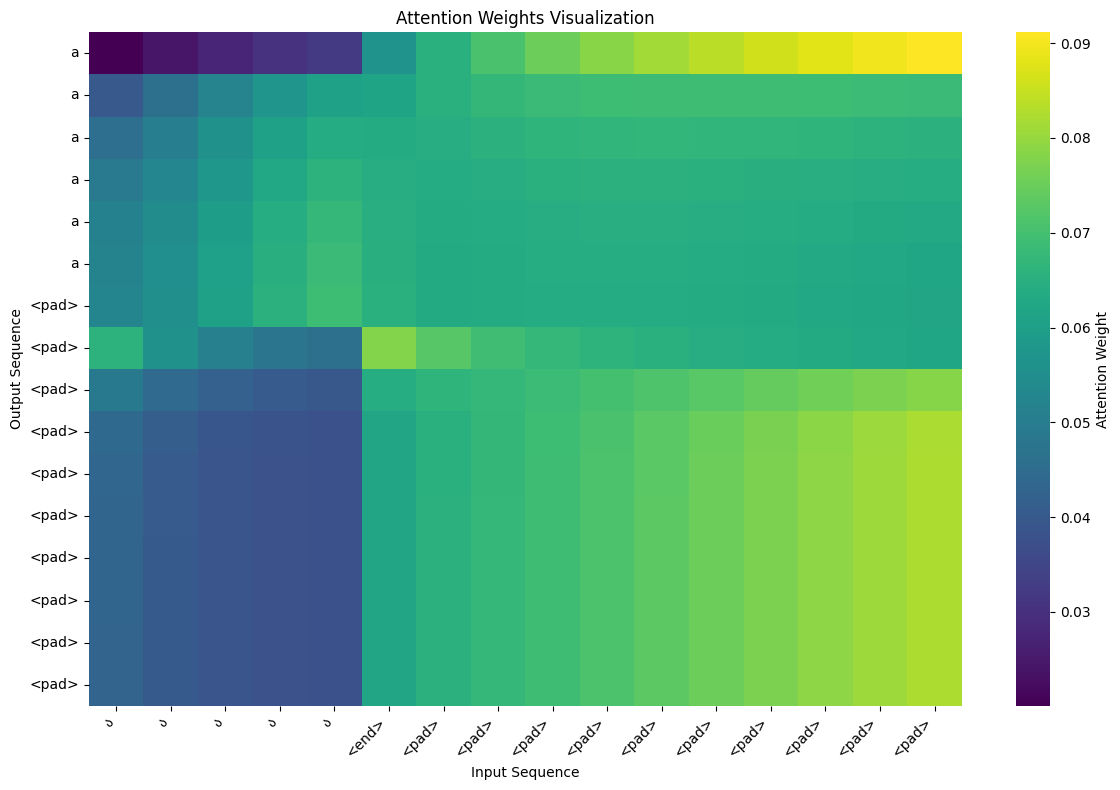

Input: გაგიხდი
Target: 
Prediction: iaaaaaaa<pad><pad><pad><pad><pad><pad><pad><pad>


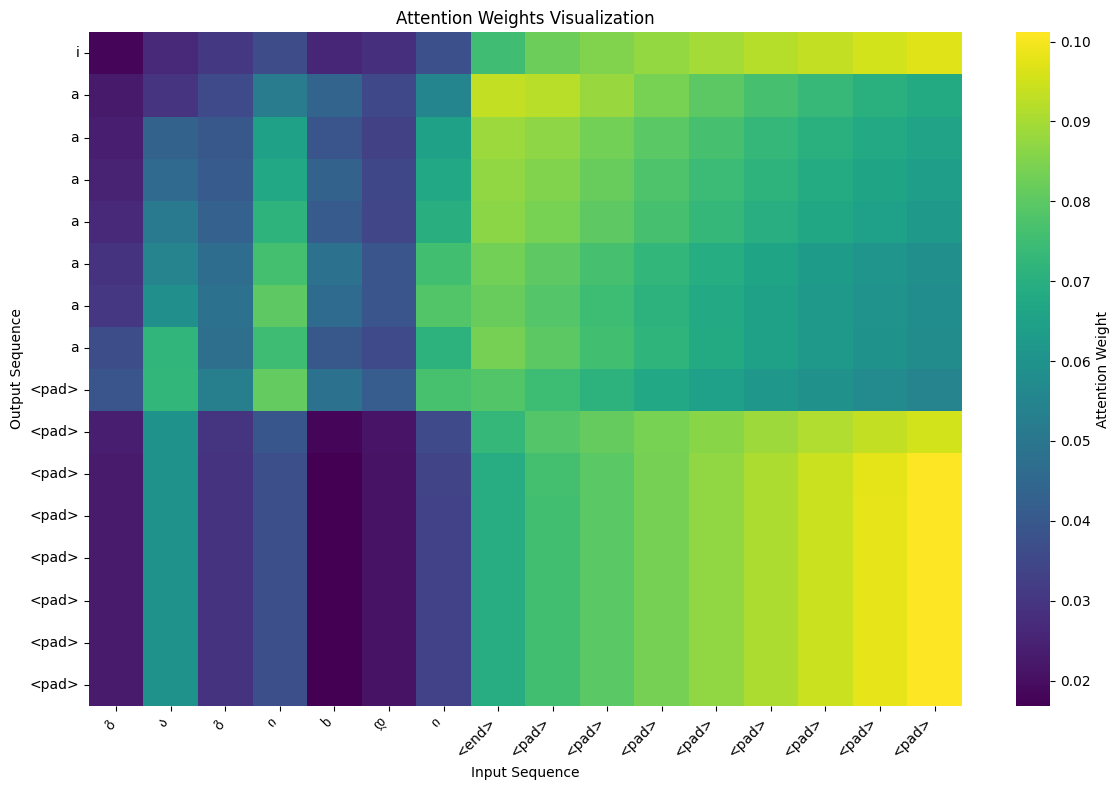

Input: ვარ
Target: 
Prediction: nrrr<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


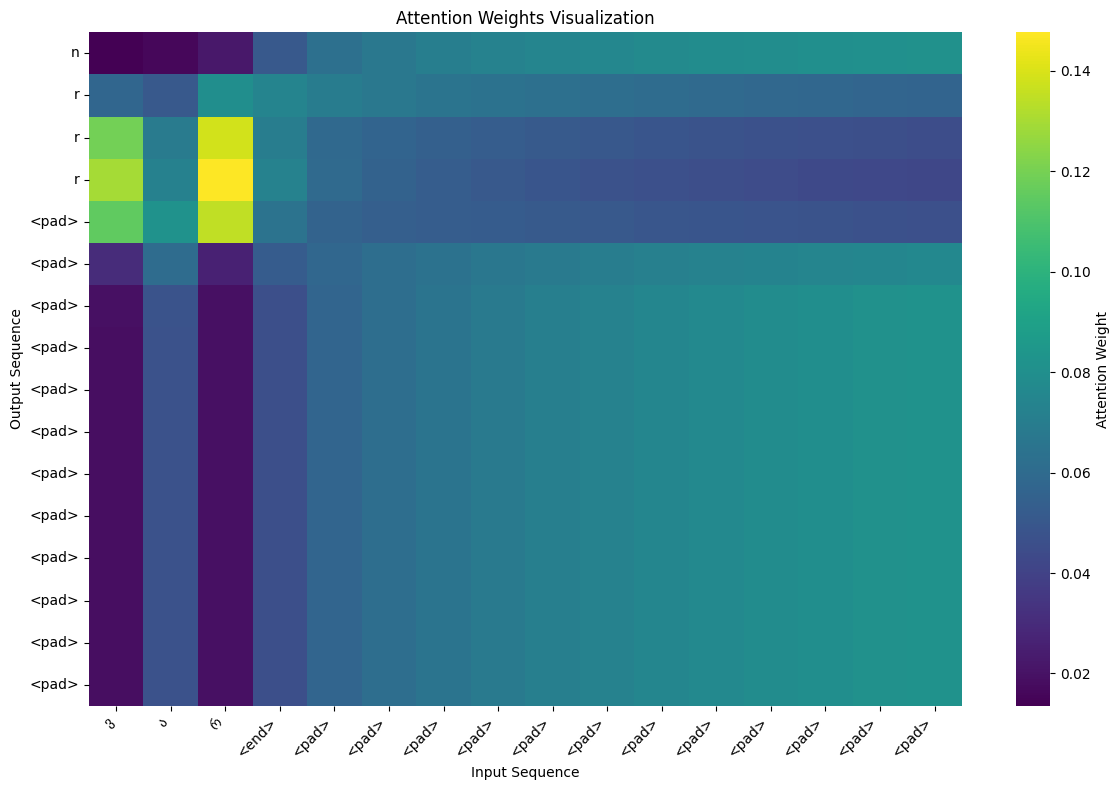

Input: მზე
Target: 
Prediction: eaa<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


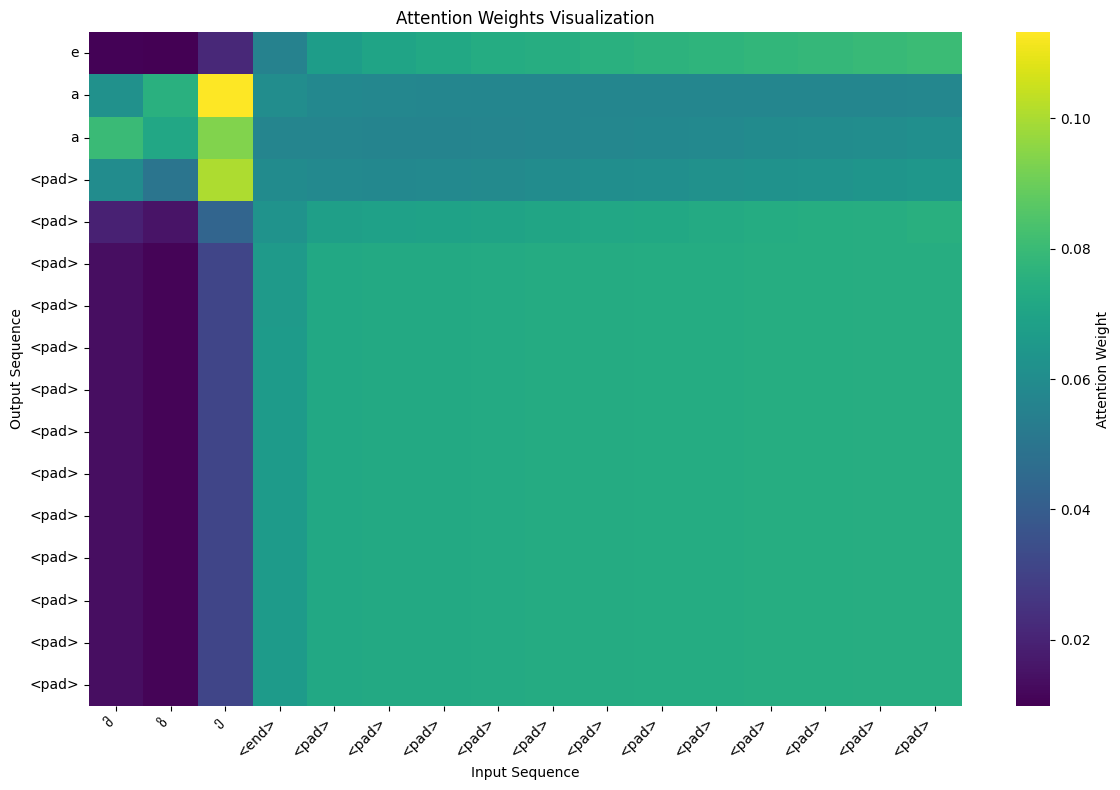

Input: მოჰხსნნის
Target: 
Prediction: siaaaaisss<pad><pad><pad><pad><pad><pad>


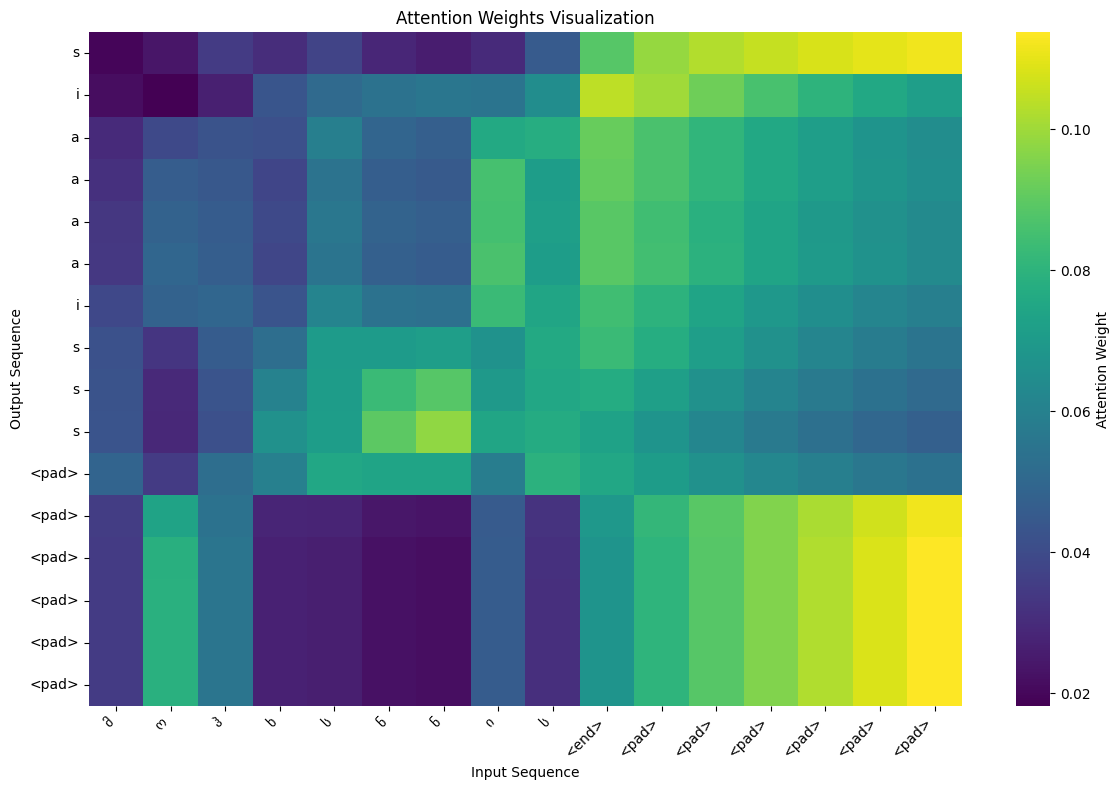

Input: დავრჩები
Target: 
Prediction: iaaeaaaae<pad><pad><pad><pad><pad><pad><pad>


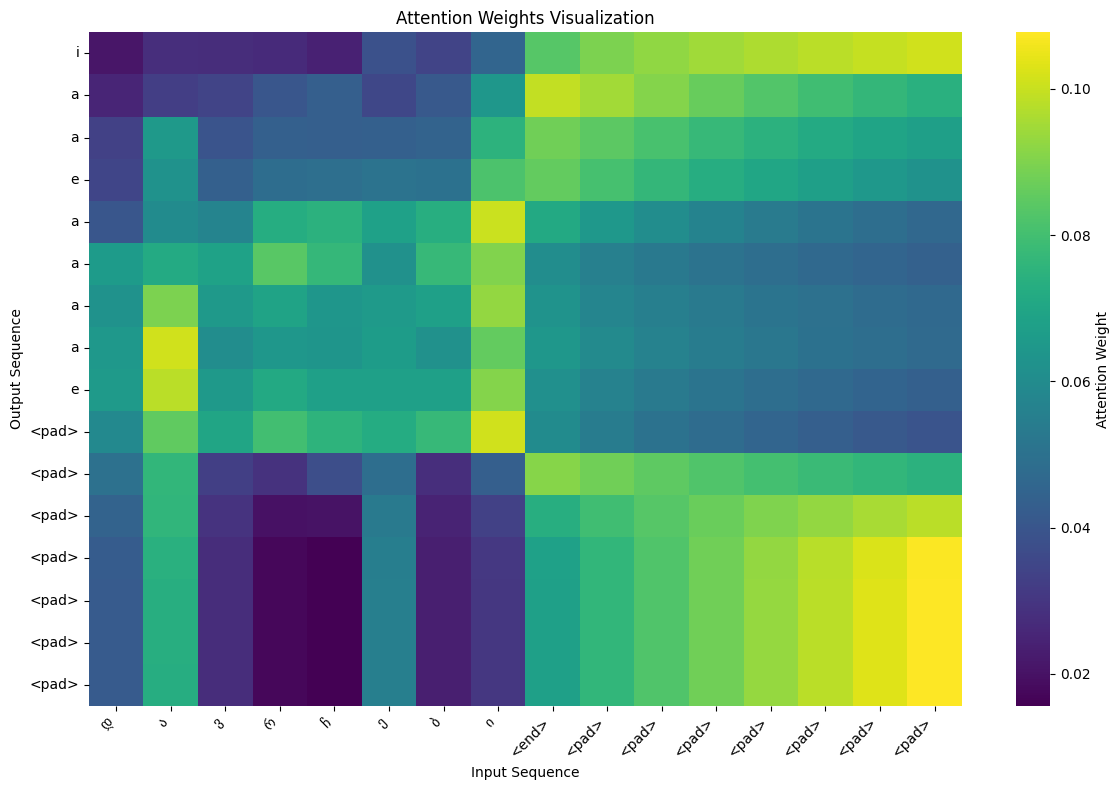

Visualizations have been logged to TensorBoard. Run 'tensorboard --logdir=runs/attention_visualization_20250324_233133' to view them.


In [18]:
visualize_attention(model=attention_model, dataset=train_ds, inference_samples=inference_samples, device=device, teacher_forcing_ratio=1.0)

# Now Use Teacher Forcing in 10% Samples only

In [19]:
best_val_loss = train_with_validation(
    attention_model=attention_model,
    train_dl=train_dl,
    val_dl=val_dl,
    attention_optimizer=attention_optimizer,
    attention_criterion=attention_criterion,
    num_epochs=num_epochs,
    device=device,
    output_dim=output_dim,
    teacher_forcing_ratio=0.1
)

Epoch [1/100]
	Train Loss: 1.1163, Train Accuracy: 0.7418
	Val Loss: 1.1765, Val Accuracy: 0.7167
	Saved new best model with validation loss: 1.1765
Epoch [2/100]
	Train Loss: 0.9883, Train Accuracy: 0.7436
	Val Loss: 1.0783, Val Accuracy: 0.7195
	Saved new best model with validation loss: 1.0783
Epoch [3/100]
	Train Loss: 0.9308, Train Accuracy: 0.7459
	Val Loss: 1.0131, Val Accuracy: 0.7295
	Saved new best model with validation loss: 1.0131
Epoch [4/100]
	Train Loss: 0.8901, Train Accuracy: 0.7498
	Val Loss: 0.9746, Val Accuracy: 0.7312
	Saved new best model with validation loss: 0.9746
Epoch [5/100]
	Train Loss: 0.8698, Train Accuracy: 0.7525
	Val Loss: 0.9870, Val Accuracy: 0.7235
Epoch [6/100]
	Train Loss: 0.8521, Train Accuracy: 0.7573
	Val Loss: 0.9639, Val Accuracy: 0.7304
	Saved new best model with validation loss: 0.9639
Epoch [7/100]
	Train Loss: 0.8355, Train Accuracy: 0.7613
	Val Loss: 0.9428, Val Accuracy: 0.7356
	Saved new best model with validation loss: 0.9428
Epoch [8

In [20]:
test_results = test_model(
    model=attention_model,
    test_dl=test_dl,
    criterion=attention_criterion,
    device=device,
    output_dim=output_dim,
    # model_path='runs/seq2seq_20240321-123456/best_model.pt'
)


Test Results:
Test Loss: 1.3295
Test Accuracy: 0.6696


Input: ოლიმპიადა
Target: 
Prediction: adiirevvm<end><pad><pad><pad><pad><pad><pad>


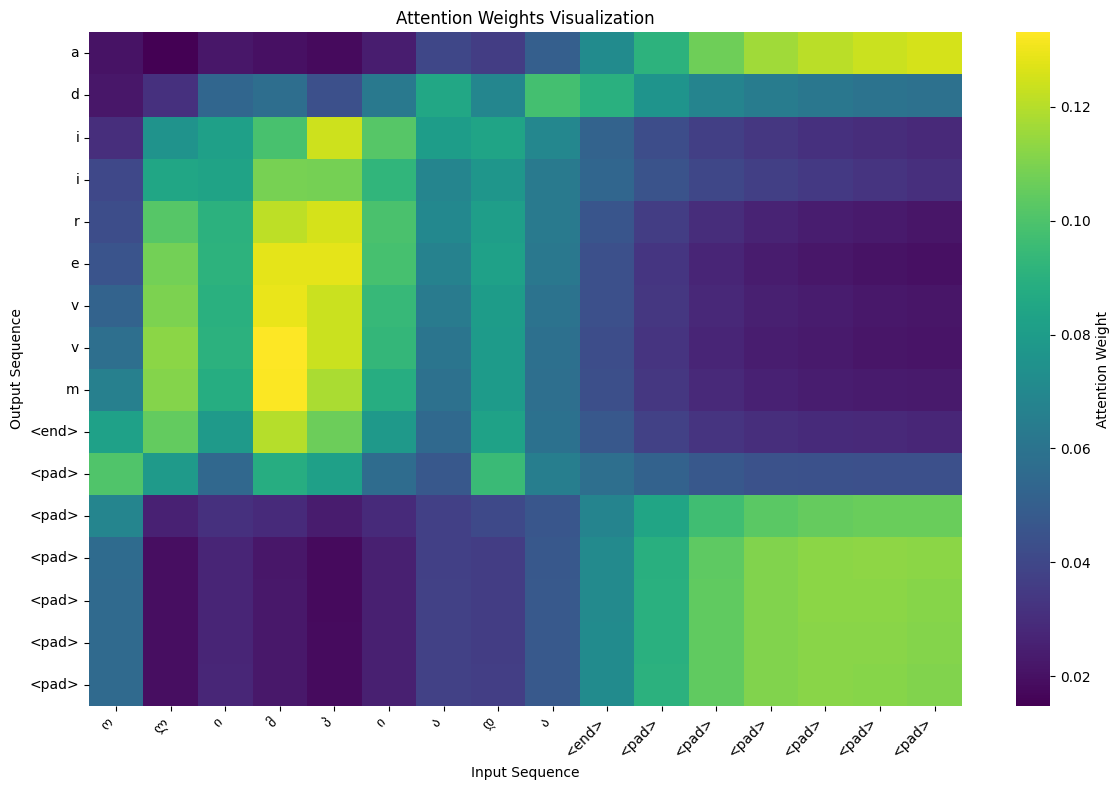

Input: რეკურენტული
Target: 
Prediction: ilerarrrvvr<end><pad><pad><pad><pad>


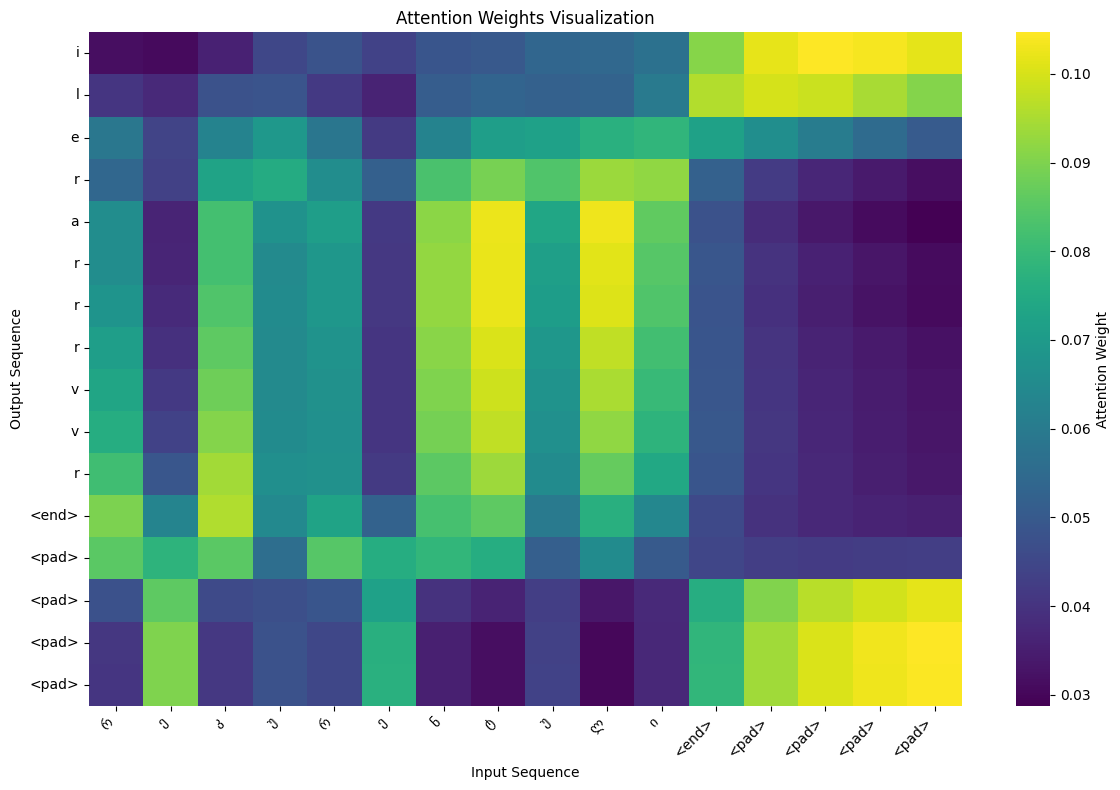

Input: ყურადღება
Target: 
Prediction: aoaraaaau<end><pad><pad><pad><pad><pad><pad>


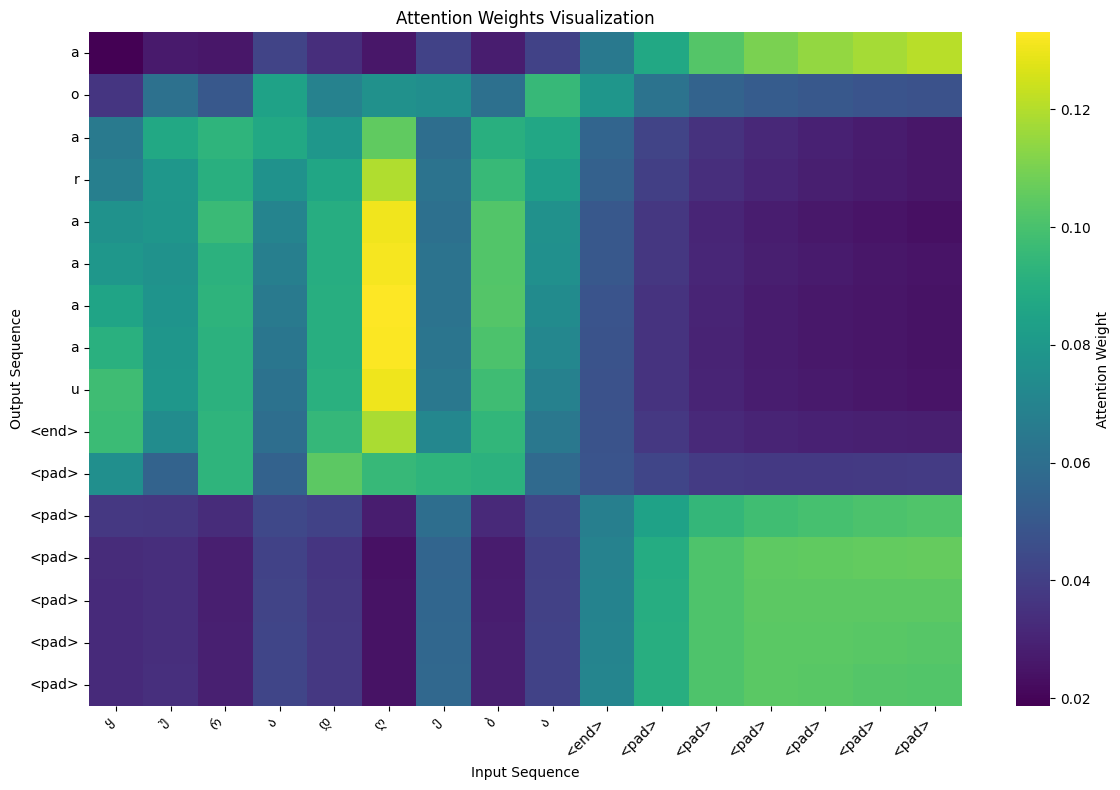

Input: ააააა
Target: 
Prediction: aaai<end><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


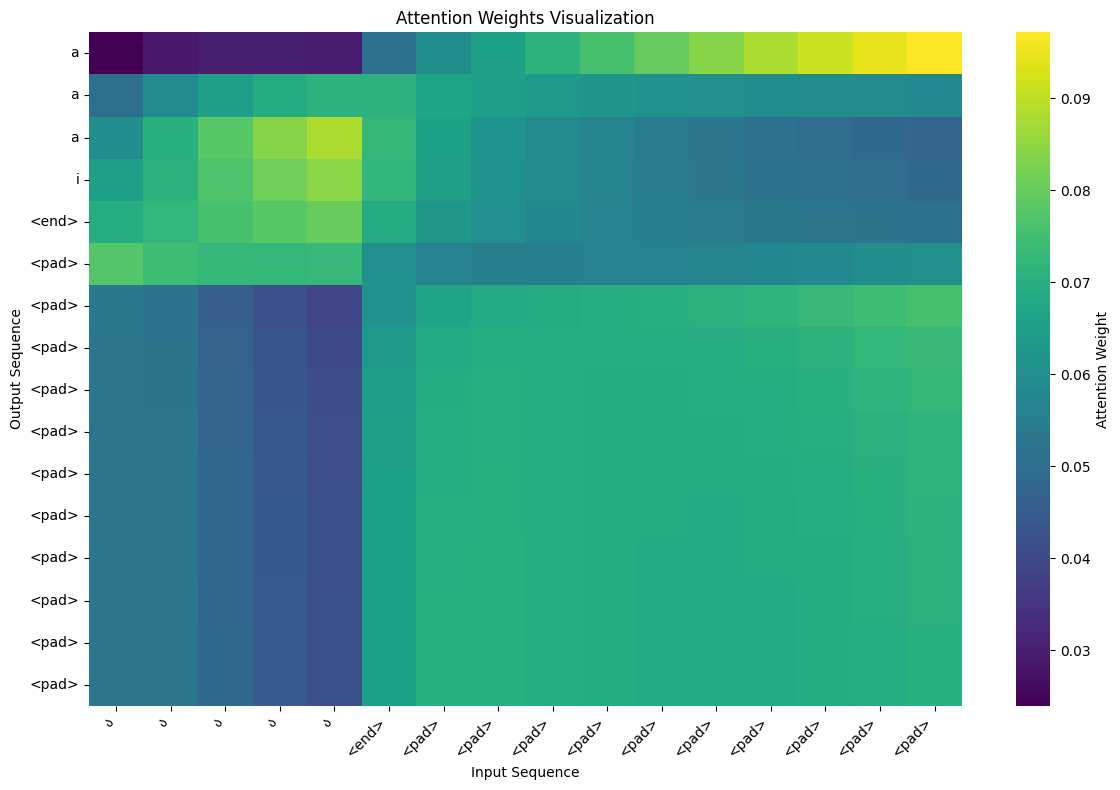

Input: გაგიხდი
Target: 
Prediction: idiaaag<end><pad><pad><pad><pad><pad><pad><pad><pad>


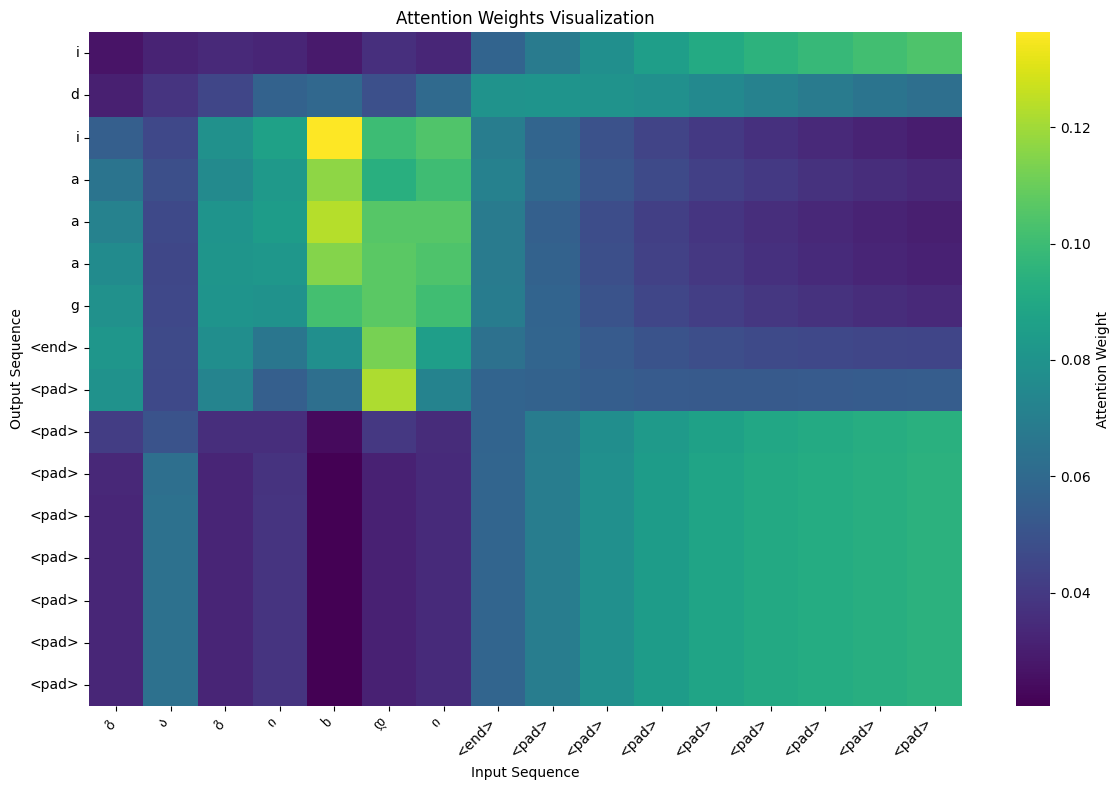

Input: ვარ
Target: 
Prediction: rar<end><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


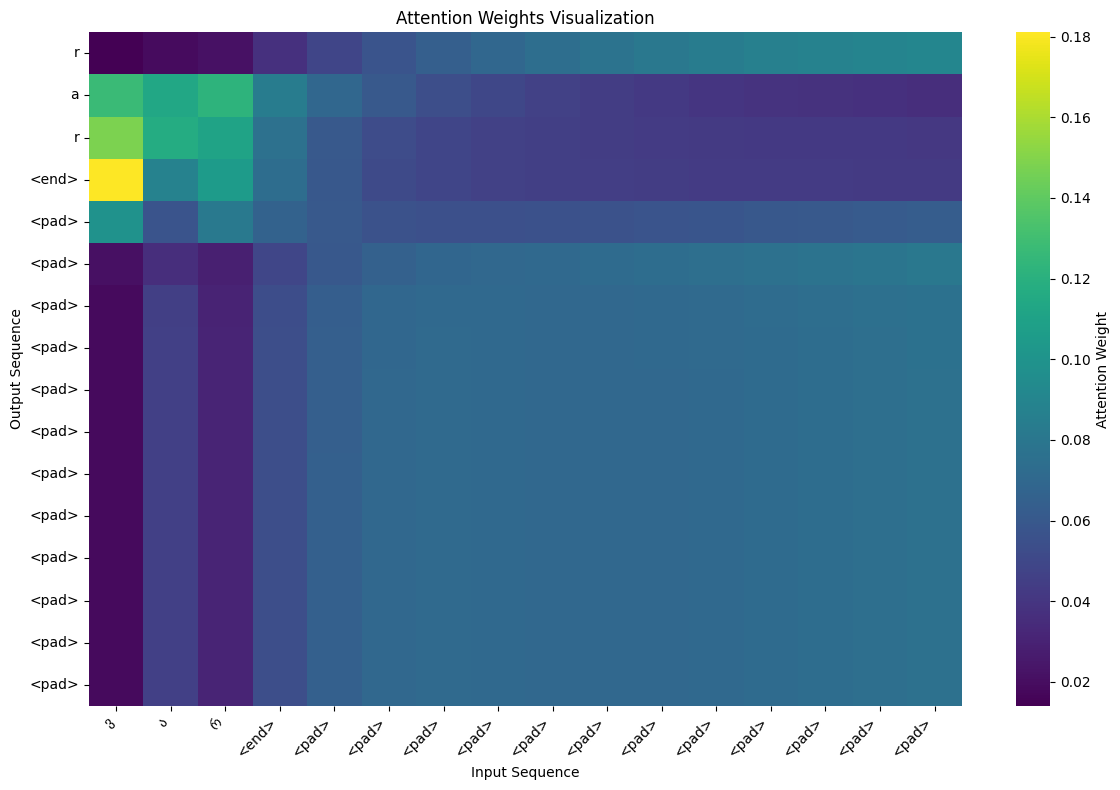

Input: მზე
Target: 
Prediction: emm<end><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>


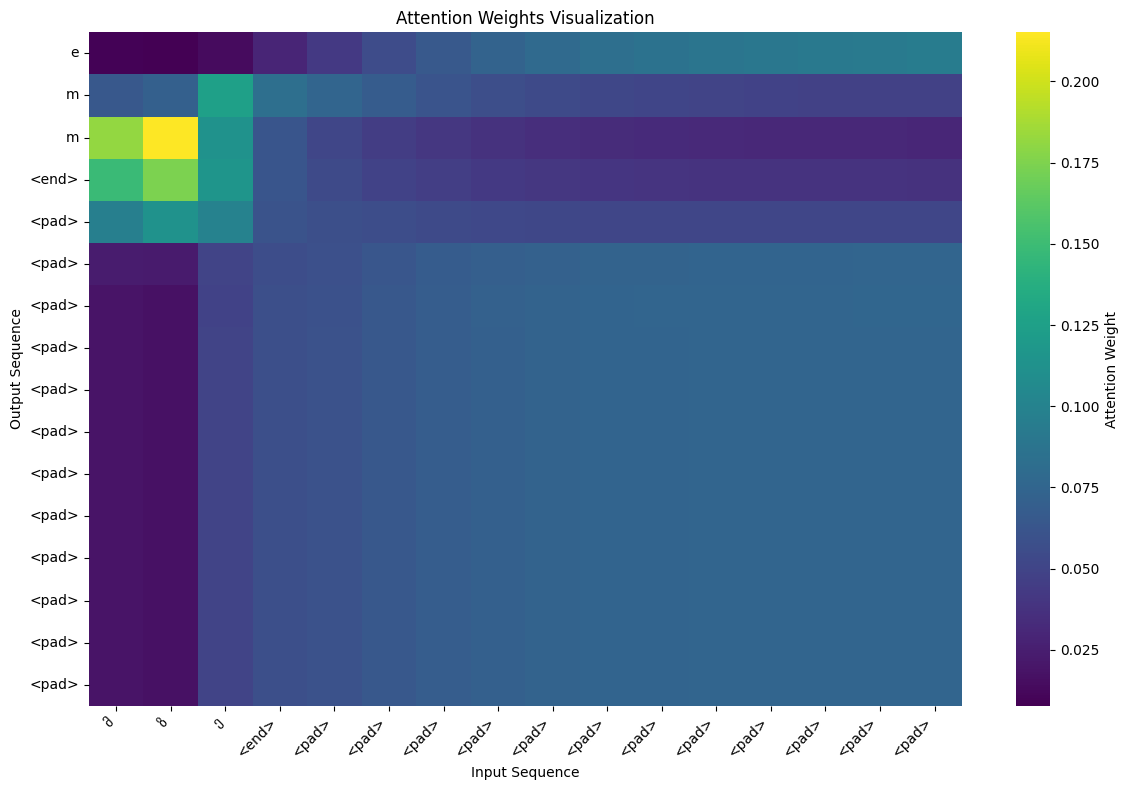

Input: მოჰხსნნის
Target: 
Prediction: sinnnmmmm<end><pad><pad><pad><pad><pad><pad>


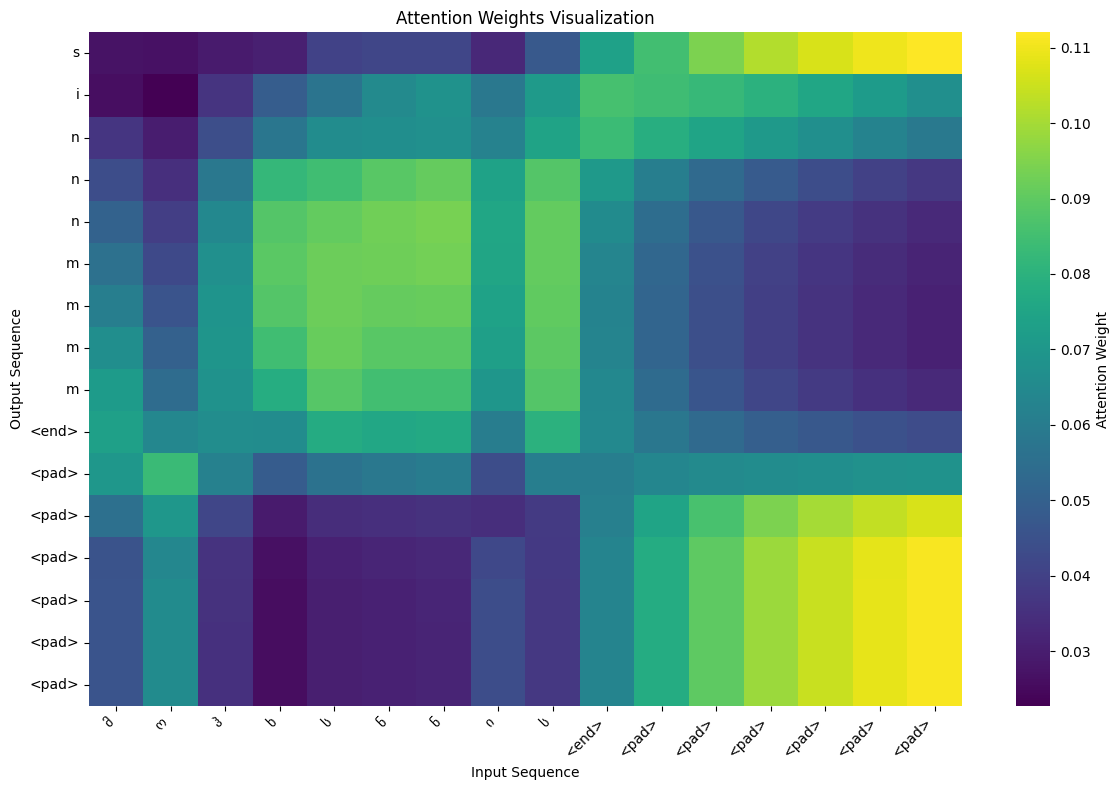

Input: დავრჩები
Target: 
Prediction: ireryaam<end><pad><pad><pad><pad><pad><pad><pad>


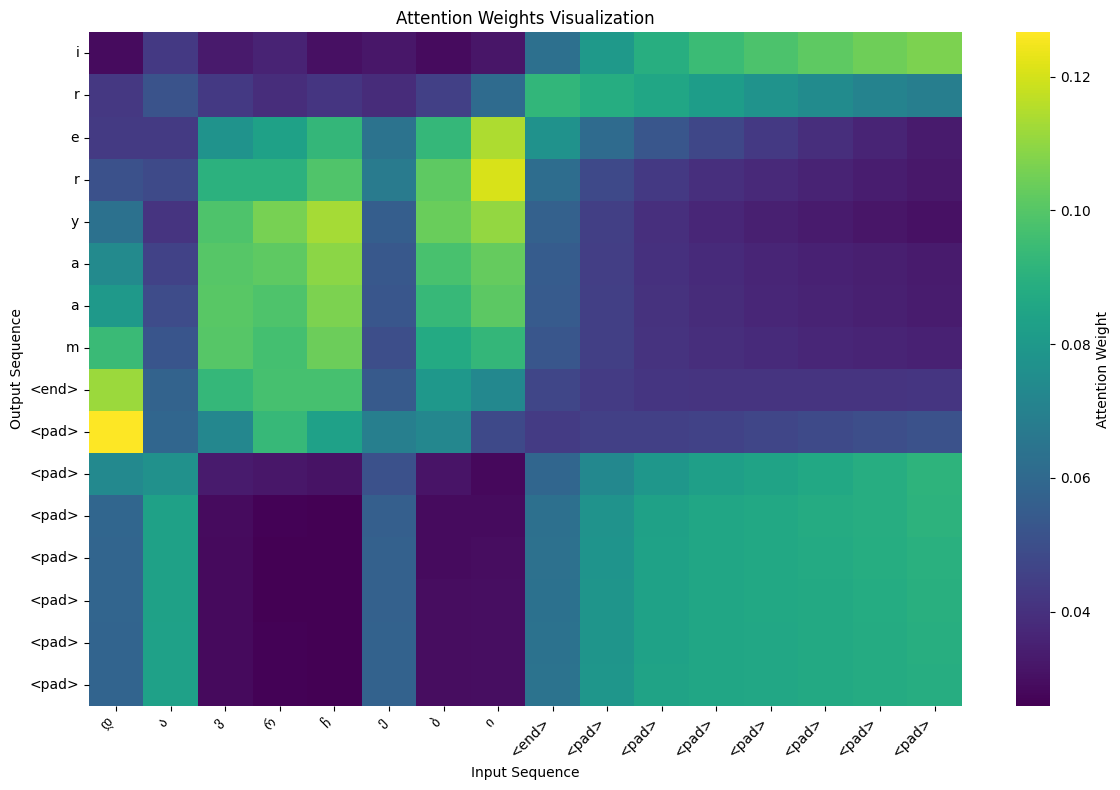

Visualizations have been logged to TensorBoard. Run 'tensorboard --logdir=runs/attention_visualization_20250324_233456' to view them.


In [21]:
visualize_attention(model=attention_model, dataset=train_ds, inference_samples=inference_samples, device=device, teacher_forcing_ratio=0.0)

# Let's see embedding space of characters of encoder and decoder parts.

In [22]:
def visualize_embeddings(model, idx_to_char):
    # Create timestamp for unique run directory
    timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    writer = SummaryWriter(f'runs/embeddings_visualization_{timestamp}')
    
    # Get embeddings
    encoder_embeddings = model.encoder.embedding.weight.data.cpu()
    decoder_embeddings = model.decoder.embedding.weight.data.cpu()
    
    # Create metadata using idx_to_char without prefixes
    encoder_metadata = [idx_to_char.get(i, str(i)) for i in range(encoder_embeddings.shape[0])]
    decoder_metadata = [idx_to_char.get(i, str(i)) for i in range(decoder_embeddings.shape[0])]
    
    # Log embeddings to TensorBoard
    writer.add_embedding(
        encoder_embeddings,
        metadata=encoder_metadata,
        tag='encoder_embeddings'
    )
    
    writer.add_embedding(
        decoder_embeddings,
        metadata=decoder_metadata,
        tag='decoder_embeddings'
    )
    
    writer.close()
    print(f"Embeddings have been logged to TensorBoard. Run 'tensorboard --logdir=runs/embeddings_visualization_{timestamp}' to view them.")


In [23]:
visualize_embeddings(model=attention_model, idx_to_char=train_ds.idx_to_char)

Embeddings have been logged to TensorBoard. Run 'tensorboard --logdir=runs/embeddings_visualization_20250324_233459' to view them.
